In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Data Preprocessing

In [6]:
df.isnull().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

#### salary is only null coulmns
#### lets see whether salary is null for those who were not placed or for others too

In [7]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [8]:
df[df['status'] == 'Not Placed']['salary'].unique() # column has only null values

array([nan])

hence those who were not places have the salary set null in the data

lets fill them with 0

In [9]:
df['salary'].fillna(0.0, inplace = True)

In [10]:
df.isnull().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary            False
dtype: bool

#### Now, no one has null values in the any column 

In [11]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#### Adding an additional column 'Mean Score' to describe score of all the education level

In [12]:
df['Mean Score'] = df['ssc_p'] + df ['hsc_p'] + df['degree_p'] +df['mba_p']
df['Mean Score'] = df['Mean Score'] / 4

# Data Visualization

Text(0.5, 1.0, 'Number of students and salary range')

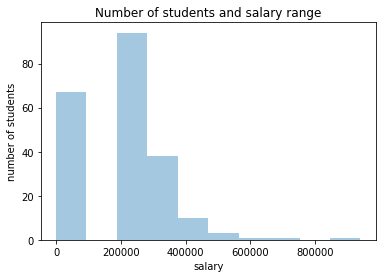

In [13]:
sns.distplot(df['salary'], kde = False)
plt.xlabel('salary')
plt.ylabel('number of students')
plt.title('Number of students and salary range')

#### Clearly most of the placed student are in the range of 2 Lac to 3 Lac

## Placement visualization

In [14]:
placed = df[df['status'] == 'Placed']
unplaced =df[df['status'] == 'Not Placed']

### 1. Placed and unplaced

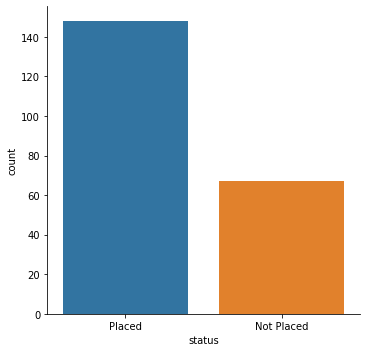

In [18]:
sns.catplot(x="status", kind="count", data=df);

### 2. Based on gender

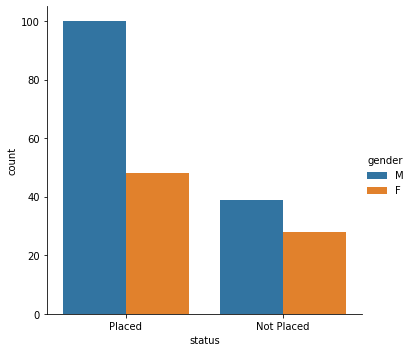

In [49]:
sns.catplot(x="status", kind="count",hue ='gender', data=df);

### Inference: The performance of Females in placement is poor as ratio of placed to unplaced males is greater than in comparison with females

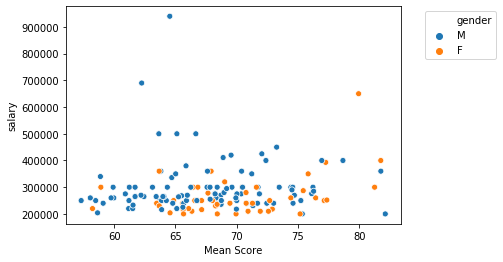

In [65]:
ax = plt.subplot(111)
sns.scatterplot(x='Mean Score',y='salary',hue='gender',data= placed)
ax.legend(bbox_to_anchor=(1.3, 1.0))

### Inference: There are more number of males in higher slab of salary than females

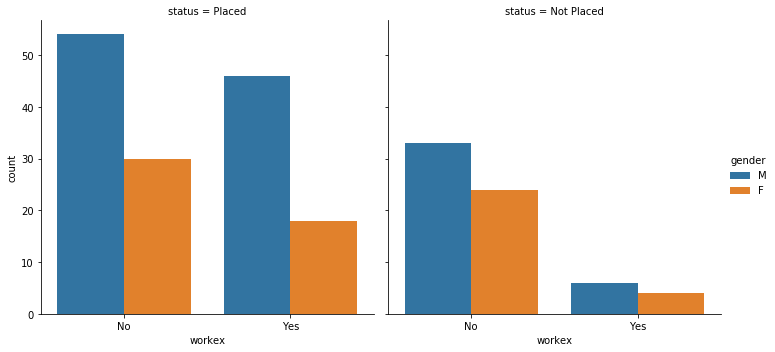

In [36]:
sns.catplot(x="workex", kind="count",hue ='gender', data=df, col='status');

### Inference: 
    There are few males and females both who has prior work experience and were not placed. Thus working experience increases the placement chances irrespective of your Gender.

## 3. Based on specialisation

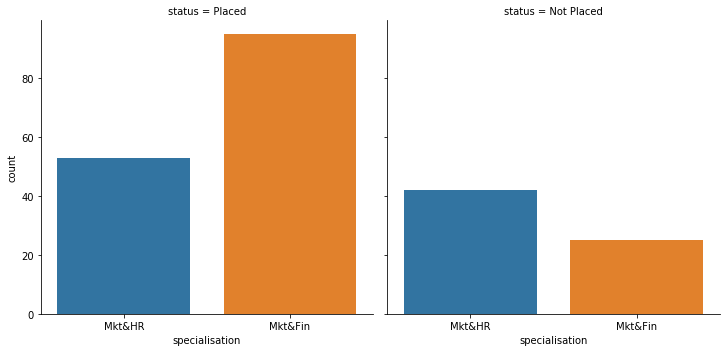

In [38]:
sns.catplot(x="specialisation", kind="count", data=df, col='status');

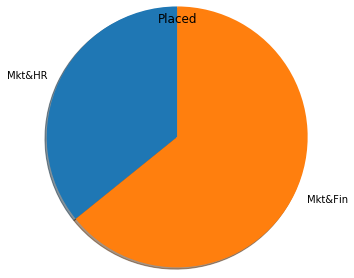

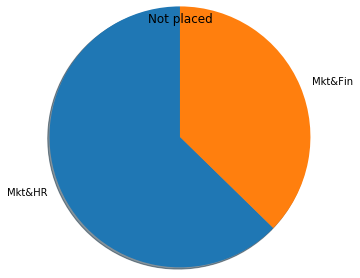

In [48]:
spec = np.asarray(df['specialisation'].unique())
placedSpec = list(map(lambda spec: len(placed[placed['specialisation'] == spec]), spec))
plt.pie(x = placedSpec, shadow = True , labels = spec, radius = 1.5, startangle=90)
plt.title('Placed')
plt.show()
unplacedSpec = list(map(lambda spec: len(unplaced[unplaced['specialisation'] == spec]), spec))
plt.pie(x = unplacedSpec, shadow = True , labels = spec, radius = 1.5, startangle=90)
plt.title('Not placed')
plt.show()

### Inference: 
    Students of Mkt&Fin gets slight more placement than students of Mkt&Hr

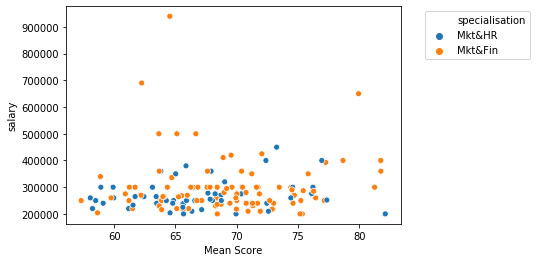

In [67]:
ax = plt.subplot(111)
sns.scatterplot(x='Mean Score',y='salary',hue='specialisation',data= placed)
ax.legend(bbox_to_anchor=(1.4, 1.0))

### Inference: 
    1. Most of the students of higher slab of salry are from Mkt&Fin .
    2. The average performance throughout career of Mkt&Fin is better than Mkt&HR.

In [86]:
placed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


## 4. Based on undergrad degree

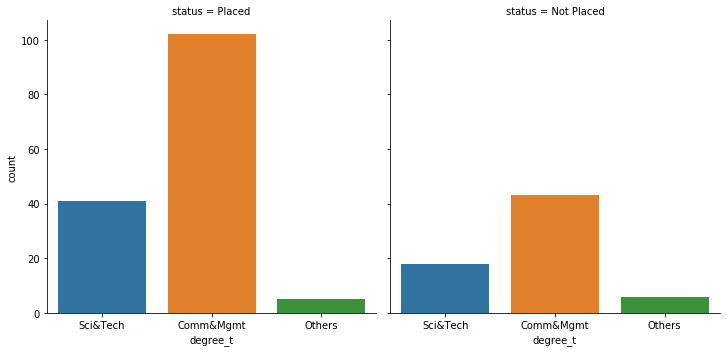

In [51]:
sns.catplot(x="degree_t", kind="count", data=df, col ='status');

### Inference: 
    1. Students of Comm & Mgmt gets almost double number of placement than rest of other courses combined.
    2. The ratio of placed and unplaced students of Comm&Mgmt & Sci&Tech are same. Hence chances of both type of students getting placed is almost same.

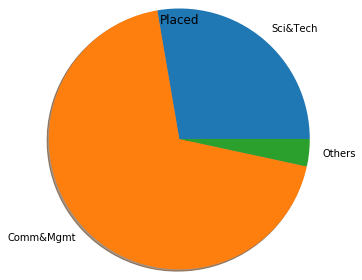

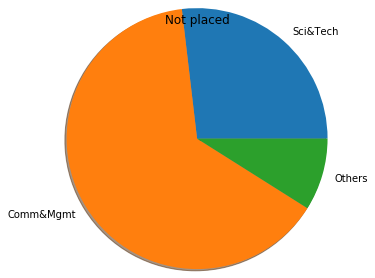

In [52]:
degree = np.asarray(df['degree_t'].unique())
placedDegree = list(map(lambda deg: len(placed[placed['degree_t'] == deg]), degree))
plt.pie(x = placedDegree, shadow = True , labels = degree, radius = 1.5 )
plt.title('Placed')
plt.show()

unplacedDegree = list(map(lambda deg: len(unplaced[unplaced['degree_t'] == deg]), degree))
plt.pie(x = unplacedDegree, shadow = True , labels = degree, radius = 1.5 )
plt.title('Not placed')
plt.show()

### Inference: 
    1. The level of similarity of both the pie charts shows that being from sci&Tech or Comm&Mgmt wont effect your placement probabilty.

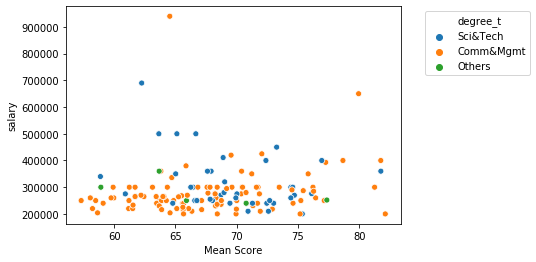

In [68]:
ax = plt.subplot(111)
sns.scatterplot(x='Mean Score',y='salary',hue='degree_t',data= placed)
ax.legend(bbox_to_anchor=(1.4, 1.0))

### Inference: 
    1. Interestingly, more Sci&Tech students grabed salary more than 5Lac than Comm&Mgmt students.
    2. But the number start becoming uniform as the slab comes lower.

## 5. Based on Employability test percentage

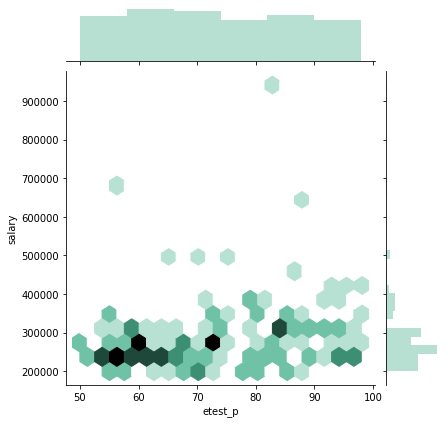

In [82]:
sns.jointplot(x='etest_p', y = 'salary', data = placed , kind="hex", color="#4CB391")

### Inference: 
    Having high scores in empployement test wont result to the higher salary as the placed are almost uniformly distributed throughout hte score and band width of for most of the students is between 2 Lacs to 3 Lacs

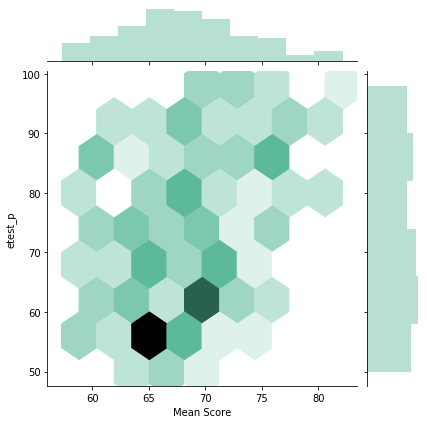

In [108]:
sns.jointplot(x='Mean Score', y = 'etest_p', data = placed , kind="hex", color="#4CB391")

### Inference: 
    The plot shows that etest_p does not  creates much differenec wrt to students overall academic performance.

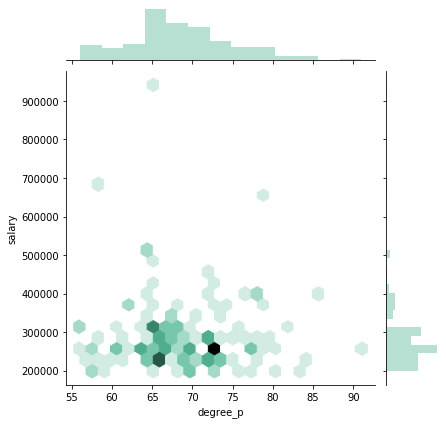

In [83]:
sns.jointplot(x='degree_p', y = 'salary', data = placed , kind="hex", color="#4CB391")

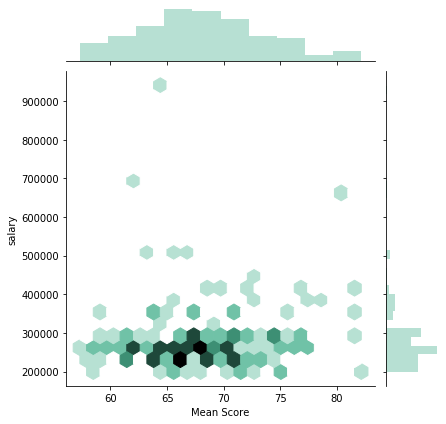

In [105]:
sns.jointplot(x='Mean Score', y = 'salary', data = placed , kind="hex", color="#4CB391")

### Inference: 
    Student with average score throughout the career perform better than high scored student

## 6. Based on Experience

In [15]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Mean Score
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,68.7000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,75.3550
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,63.7000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,54.8575
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,72.0500


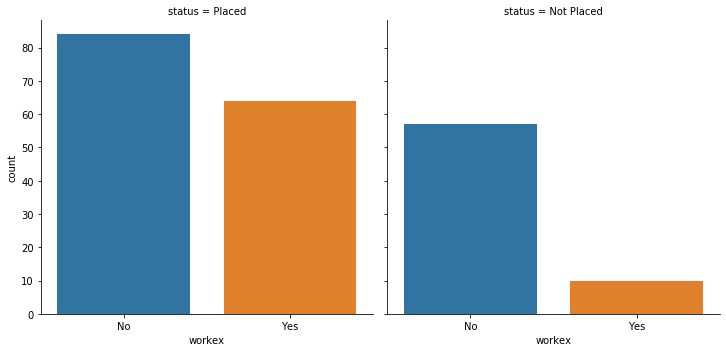

In [16]:
sns.catplot(x="workex", kind="count", data=df, col ='status');

### Inference: 
    Having a prior experinece increases the chances of placement.

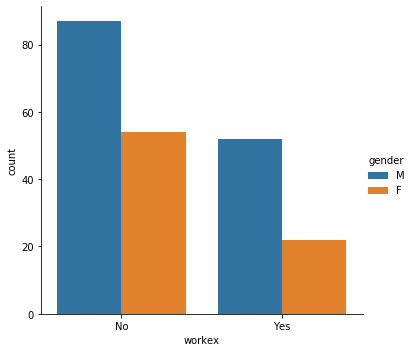

In [22]:
sns.catplot(x="workex", kind="count", data=df, hue = 'gender');

### Inference: 
    1. There more numbers of unexperinced studnets than experineced.
    2. There more experinecd males than females. 

## 7. Correlation

In [23]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Mean Score
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,68.7000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,75.3550
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,63.7000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,54.8575
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,72.0500


In [30]:
scoresMatPlaced = placed.loc[:, ['ssc_p','hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'Mean Score']]

In [31]:
scoresMatPlaced.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,Mean Score
0,67.00,91.00,58.00,55.0,58.80,270000.0,68.700
1,79.33,78.33,77.48,86.5,66.28,200000.0,75.355
2,65.00,68.00,64.00,75.0,57.80,250000.0,63.700
4,85.80,73.60,73.30,96.8,55.50,425000.0,72.050
7,82.00,64.00,66.00,67.0,62.14,252000.0,68.535


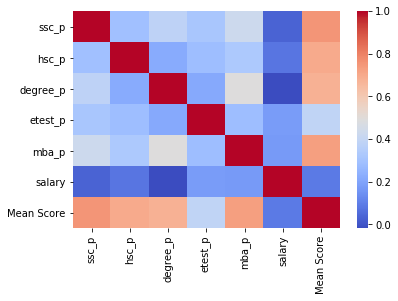

In [32]:
sns.heatmap(scoresMatPlaced.corr(), cmap = 'coolwarm')

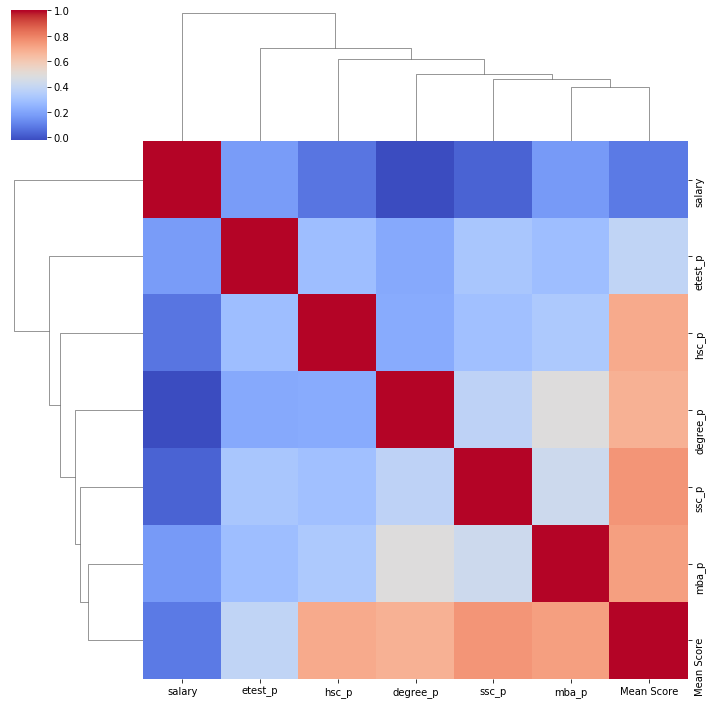

In [33]:
sns.clustermap(scoresMatPlaced.corr(), cmap ='coolwarm')

### Inference: 
    No exams throughout the career is correlated with salary.

# Thank You